# Cleaning the Data

In [3]:
# importing the libraries
import pandas as pd
import re


In [5]:
# reading the csv file
games_df = pd.read_csv("Boardgames.csv")

In [7]:
games_df

,project id,name,category,subcategory,City,State / Country,status,goal,pledged,funded percentage,backers,Date,levels,reward levels,updates,comments,duration
0,7965283,Passing Shot: Dice Tennis Game,Games,Board & Card Games,Indianapolis,IN,successful,500,813,1.626000,30,"Saturday, January 28, 2012",8,"$13,$20,$22,$27,$28,$36,$46,$64",1,1,30.00
1,11964132,Tai Chi and Kung Fu Come Alive in Figurines &a...,Games,Board & Card Games,Wellford,SC,failed,46900,775,0.016525,7,"Thursday, May 17, 2012",7,"$10,$25,$50,$100,$500,$1,000,$3,000",1,0,30.00
2,22848517,Polynesian Adventure - the board game,Games,Board & Card Games,Laie,HI,successful,2500,2710,1.084000,26,"Thursday, May 17, 2012",8,"$1,$5,$25,$45,$85,$120,$200,$250",2,2,30.00
3,32496454,I need help printing my play mats,Games,Board & Card Games,Phoenix,AZ,live,180,0,0.000000,0,"Friday, June 8, 2012",10,"$1,$10,$25,$40,$40,$40,$40,$40,$40,$40",3,0,30.00
4,40559844,Countermeasures Collectible Card Game,Games,Board & Card Games,Hollis,NH,failed,200,57,0.285000,4,"Saturday, July 23, 2011",15,"$1,$2,$5,$12,$18,$18,$22,$35,$35,$50,$55,$70,$...",1,0,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,2003117786,*****HIP HOP FAME GAME***** by Anthony Taylor,Games,Board & Card Games,Queens,NY,failed,3000,287,0.095667,9,"Thursday, October 21, 2010",1,$5,0,0,35.00
548,2067757786,HEY MOM! CAN I DRIVE? OR HEY DAD! CAN I DRIVE?,Games,Board & Card Games,Litchfield Park,AZ,failed,45000,591,0.013133,14,"Saturday, December 10, 2011",10,"$25,$45,$65,$85,$100,$250,$350,$500,$1,000,$3,000",3,0,50.00
549,2083678620,Argyle &amp; Crew - Soppet Adventures! The soc...,Games,Board & Card Games,Boston,MA,failed,3000,1675,0.558333,65,"Saturday, August 27, 2011",10,"$3,$5,$10,$25,$50,$75,$100,$250,$500,$1,000",14,0,36.67
550,2084464595,Pixel Wars,Games,Board & Card Games,Palo Alto,CA,failed,1500,0,0.000000,0,"Wednesday, October 6, 2010",7,"$1,$10,$25,$40,$70,$100,$200",0,0,59.98


In [9]:
# Function to clean and sum up reward levels
def sum_rewards(row):
    # Find all numbers (including those with commas for thousands) using regex
    numbers = re.findall(r'\$?([\d,]+)', row)
    # Convert to integers after removing commas
    numbers = [int(num.replace(",", "")) for num in numbers]
    return sum(numbers)

# Apply function to each row in the "Reward Levels" column and create a new column
games_df["Total Reward"] = games_df["reward levels"].apply(sum_rewards)

# Display the updated DataFrame
games_df.head()

,project id,name,category,subcategory,City,State / Country,status,goal,pledged,funded percentage,backers,Date,levels,reward levels,updates,comments,duration,Total Reward
0,7965283,Passing Shot: Dice Tennis Game,Games,Board & Card Games,Indianapolis,IN,successful,500,813,1.626000,30,"Saturday, January 28, 2012",8,"$13,$20,$22,$27,$28,$36,$46,$64",1,1,30.0,256
1,11964132,Tai Chi and Kung Fu Come Alive in Figurines &a...,Games,Board & Card Games,Wellford,SC,failed,46900,775,0.016525,7,"Thursday, May 17, 2012",7,"$10,$25,$50,$100,$500,$1,000,$3,000",1,0,30.0,4685
2,22848517,Polynesian Adventure - the board game,Games,Board & Card Games,Laie,HI,successful,2500,2710,1.084000,26,"Thursday, May 17, 2012",8,"$1,$5,$25,$45,$85,$120,$200,$250",2,2,30.0,731
3,32496454,I need help printing my play mats,Games,Board & Card Games,Phoenix,AZ,live,180,0,0.000000,0,"Friday, June 8, 2012",10,"$1,$10,$25,$40,$40,$40,$40,$40,$40,$40",3,0,30.0,316
4,40559844,Countermeasures Collectible Card Game,Games,Board & Card Games,Hollis,NH,failed,200,57,0.285000,4,"Saturday, July 23, 2011",15,"$1,$2,$5,$12,$18,$18,$22,$35,$35,$50,$55,$70,$...",1,0,30.0,753


# Visualising the Correlation

<Axes: >

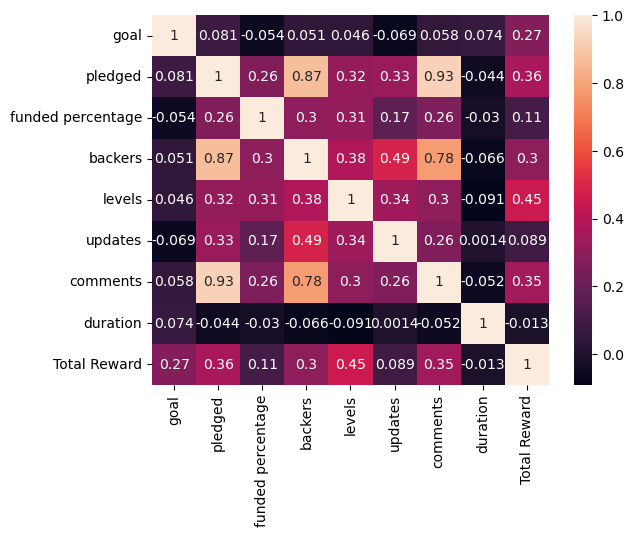

In [27]:
# we used a heatmap to check the correlation and which columns to use as features
import seaborn as sns
sns.heatmap(games_df[["goal", "pledged", "funded percentage", "backers", "levels", "updates", "comments", "duration", "Total Reward"]].corr(),annot = True )

# Machine Learning


In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(games_df, test_size=0.2, random_state=42)

In [32]:
# importing the ML model
from sklearn.linear_model import LinearRegression

# splitting the data to X (features) and y (predictor)
features = ["Total Reward", "duration", "updates", "levels"]
predictor = ["pledged"]

X= games_df[features]
y= games_df[predictor]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred


array([[ 1.84669971e+03],
       [ 1.38182692e+04],
       [ 8.18434536e+03],
       [-2.84303566e+03],
       [ 3.70849373e+03],
       [ 1.03439772e+04],
       [ 2.75563126e+04],
       [ 8.28725620e+02],
       [ 1.37110514e+04],
       [-4.23207919e+03],
       [ 2.99915597e+04],
       [ 8.45178164e+03],
       [-4.26585020e+02],
       [ 8.90899009e+03],
       [ 5.77779384e+03],
       [ 1.02053693e+04],
       [ 1.69174543e+04],
       [-8.07537188e+02],
       [ 6.69510195e+03],
       [ 3.32952239e+03],
       [ 4.03359233e+04],
       [ 9.37208819e+03],
       [ 1.21236602e+04],
       [-2.88298282e+03],
       [ 1.34315393e+03],
       [ 3.27402584e+04],
       [ 2.01756917e+03],
       [ 1.84332192e+03],
       [ 6.31156746e+03],
       [ 1.64063915e+04],
       [ 1.20325398e+04],
       [ 8.03723271e+03],
       [ 2.15670022e+04],
       [ 1.74701931e+04],
       [ 6.78005956e+03],
       [ 2.79976099e+04],
       [-2.94464198e+03],
       [ 6.67922464e+03],
       [ 1.2

In [34]:
# Evaluating the model
from sklearn import metrics
from sklearn.metrics import median_absolute_error
median_error = median_absolute_error (y_test, y_pred)
# (median_error/games_df[["pledged"]].sum())*100\
median_error

5187.45238804672

In [36]:
games_df[["pledged"]].median()

pledged    2706.0
dtype: float64

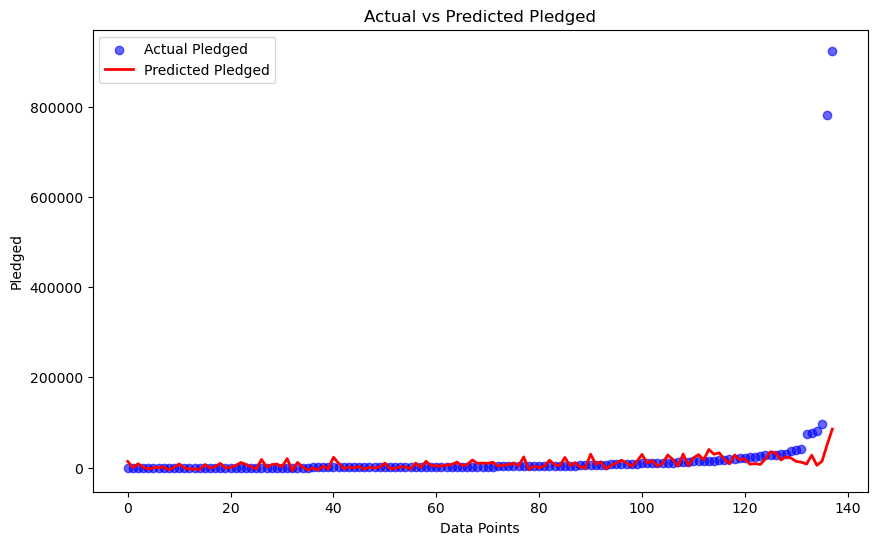

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the data for better visualization (optional)
sorted_indices = np.argsort(y_test.values.flatten())
y_test_sorted = y_test.values.flatten()[sorted_indices]
y_pred_sorted = y_pred.flatten()[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual Pledged', alpha=0.6)
plt.plot(range(len(y_pred_sorted)), y_pred_sorted, color='red', label='Predicted Pledged', linewidth=2)
plt.xlabel('Data Points')
plt.ylabel('Pledged')
plt.title('Actual vs Predicted Pledged')
plt.legend()
plt.show()

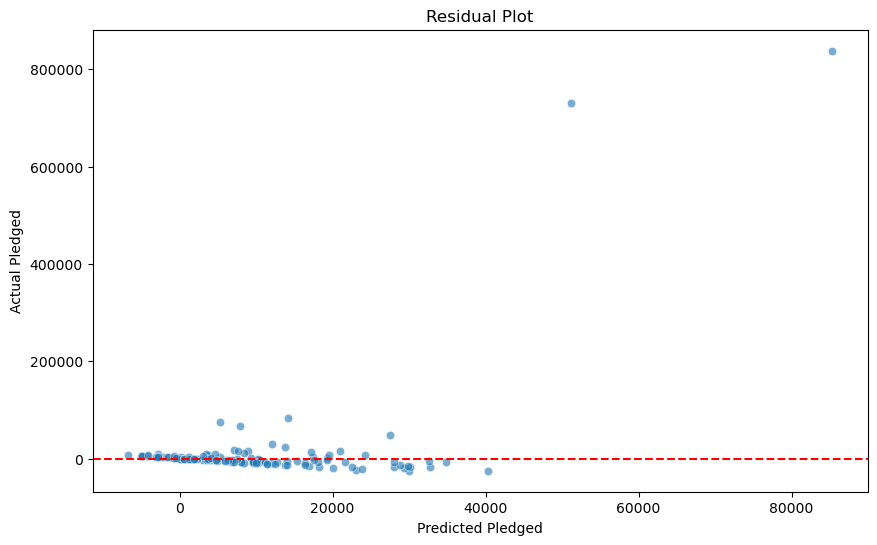

In [40]:
# Residual plot
residuals = y_test.values.flatten() - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Pledged')
plt.ylabel('Actual Pledged')
plt.title('Residual Plot')
plt.show()

In [23]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")

NameError: name 'y_test' is not defined